In [404]:
#import libraries

import requests
import json
from citipy import citipy
import random
import pandas as pd
from config import api_key
import time
import matplotlib.pyplot as plt

In [405]:
#create a list for cities, country, latitude and longitude to hold the values from citypy

city_list = []
country_list = []
latitude = []
longitude = [] 
count = 0

#Randomly generate the lalitude and longitudes to obtain 600 cities

while count <= 600:
    
    lat, long = uniform(-90,90), uniform(-180, 180)
    
    city = citipy.nearest_city(lat, long)
    country = city.country_code
    city = city.city_name
    
#If the city already exists in the list skip it and move to the next row

    if  (city in city_list and country in country_list):
        lat, long = 0, 0
    else:
        city_list.append(city)
        country_list.append(country)
        latitude.append(lat)
        longitude.append(long)
        count = count + 1

city_df = pd.DataFrame({"city":city_list,"country":country_list,"latitude":latitude,"longitude":longitude})

print("Nbr of Cities " + str(city_df["city"].count()))

Ccity_df.head()

Nbr of Cities 601


city country   latitude   longitude
0  longyearbyen      sj  78.774600   16.643534
1          naze      jp  27.221331  132.764412
2        shache      cn  38.788065   78.376550
3        atuona      pf  -4.690829 -135.968921
4     upernavik      gl  74.764817  -60.487663

In [406]:
#Call the API and retreive the city weather. When calling the API add a delay of 1 second 

base = "http://api.openweathermap.org/data/2.5/weather"
count = 0
weather_data = pd.DataFrame(columns=['City','Country','Latitude','Longitude','Max Temp','Cloudiness',
                                     'Humidity','Date','Wind Speed'])


for city in city_df["city"]:
    
    count = count + 1
    
    if count % 20 == 0:
        print(f"{count} nbr of records processed")
    
    params ={"appid":api_key, "q":city, "units":"imperial"}
    
    time.sleep(1)
    response=requests.get(base,params=params)
    print(f"{city}: {response.url}")
    response=response.json()    
    
    try:
        city_name = response["name"]
        clouds = response["clouds"]["all"]
        humidity= response["main"]['humidity']
        dt = response["dt"]
        latitude = response["coord"]['lat']
        longitude = response["coord"]['lon']
        temp = response["main"]['temp_max']
        speed= response["wind"]['speed']
        country = response["sys"]["country"]
        
        weather_data = weather_data.append({'City':city_name,'Cloudiness': clouds, 'Humidity': humidity, 'Date': dt,
                                            'Latitude':latitude,'Longitude':longitude,
                                            'Country':country,'Max Temp':temp,'Wind Speed':speed},ignore_index=True)
    except (ConnectionError, TimeoutError, KeyError) as err:
            message = response["message"] 
            print(f"Error Key {err} and Message is: {message} : {city}")
            
weather_data

LONGYEARBYEN: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=longyearbyen&units=imperial
NAZE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=naze&units=imperial
SHACHE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=shache&units=imperial
ATUONA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=atuona&units=imperial
UPERNAVIK: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=upernavik&units=imperial
RIKITEA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=rikitea&units=imperial
PROVIDENIYA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=provideniya&units=imperial
SAMPIT: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=sampit&units=imperial
BELAYA GORA: http://api.openwe

KILINDONI: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kilindoni&units=imperial
NOBEOKA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=nobeoka&units=imperial
GIGMOTO: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=gigmoto&units=imperial
KAA-KHEM: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kaa-khem&units=imperial
CIDREIRA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=cidreira&units=imperial
SARANKHOLA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=sarankhola&units=imperial
YULARA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=yulara&units=imperial
RAGLAN: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=raglan&units=imperial
FULING: http://api.openweather

HAY RIVER: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=hay+river&units=imperial
BREDASDORP: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=bredasdorp&units=imperial
ILEBO: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ilebo&units=imperial
NAUTLA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=nautla&units=imperial
ANCUD: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ancud&units=imperial
PALU: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=palu&units=imperial
UST-ILIMSK: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ust-ilimsk&units=imperial
NOUAKCHOTT: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=nouakchott&units=imperial
VOSTOK: http://api.openweathermap.

CIUDAD BOLIVAR: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ciudad+bolivar&units=imperial
YANJI: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=yanji&units=imperial
PORT ELIZABETH: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=port+elizabeth&units=imperial
ALTAMIRA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=altamira&units=imperial
KUNUNURRA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kununurra&units=imperial
TUMANNYY: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=tumannyy&units=imperial
Error Key 'name' and Message is: city not found : tumannyy
SALINOPOLIS: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=salinopolis&units=imperial
BROOME: http://api.openweathermap.org/data/2.5/weather?appid=

IXTAPA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ixtapa&units=imperial
KAPAA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kapaa&units=imperial
PIZARRO: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=pizarro&units=imperial
MENTOK: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=mentok&units=imperial
Error Key 'name' and Message is: city not found : mentok
LAVRENTIYA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lavrentiya&units=imperial
GLENWOOD SPRINGS: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=glenwood+springs&units=imperial
260 nbr of records processed
TIKSI: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=tiksi&units=imperial
PONTA DO SOL: http://api.openweathermap.org/data/2.5/weather?a

WEWAK: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=wewak&units=imperial
320 nbr of records processed
CHERSKIY: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=cherskiy&units=imperial
MAYOR PABLO LAGERENZA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=mayor+pablo+lagerenza&units=imperial
KAZACHINSKOYE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kazachinskoye&units=imperial
YANTAL: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=yantal&units=imperial
SOSNOVSKIY: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=sosnovskiy&units=imperial
Error Key 'name' and Message is: city not found : sosnovskiy
KIETA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kieta&units=imperial
SANGAR: http://api.openweatherma

CUMRA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=cumra&units=imperial
NURMAHAL: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=nurmahal&units=imperial
VIKULOVO: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=vikulovo&units=imperial
MAMALLAPURAM: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=mamallapuram&units=imperial
ITAREMA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=itarema&units=imperial
ERICE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=erice&units=imperial
EKIBASTUZ: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ekibastuz&units=imperial
MINAB: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=minab&units=imperial
REY BOUBA: http://api.openweatherm

YINING: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=yining&units=imperial
COARI: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=coari&units=imperial
UXBRIDGE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=uxbridge&units=imperial
HOFN: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=hofn&units=imperial
YANAM: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=yanam&units=imperial
WAKISO: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=wakiso&units=imperial
LONGYAN: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=longyan&units=imperial
LAMU: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lamu&units=imperial
PALABUHANRATU: http://api.openweathermap.org/data/2.5/weather?

TERRACE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=terrace&units=imperial
MORANT BAY: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=morant+bay&units=imperial
KUYANOVO: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kuyanovo&units=imperial
CIUDAD DARIO: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ciudad+dario&units=imperial
RIYADH: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=riyadh&units=imperial
LOS LLANOS DE ARIDANE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=los+llanos+de+aridane&units=imperial
MITCHELL: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=mitchell&units=imperial
LUDERITZ: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=luderitz&units=i

POPONDETTA: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=popondetta&units=imperial
NILAGIRI: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=nilagiri&units=imperial
MARRAKESH: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=marrakesh&units=imperial
DEPUTATSKIY: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=deputatskiy&units=imperial
ADEJE: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=adeje&units=imperial
SAN CRISTOBAL: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=san+cristobal&units=imperial
NADYM: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=nadym&units=imperial
VILYUYSK: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=vilyuysk&units=imperial
580 nbr of rec

City Country  Latitude  Longitude Max Temp Cloudiness  \
0              Longyearbyen      NO     78.22      15.63        5         40   
1                      Naze      NG      5.43       7.07    81.78         20   
2                    Shache      CN     38.42      77.24    45.06          0   
3                    Atuona      PF     -9.80    -139.03    76.65         36   
4                 Upernavik      GL     72.79     -56.15     1.68          8   
5                   Rikitea      PF    -23.12    -134.97    81.06         56   
6               Provideniya      RU     64.42    -173.23    19.95         44   
7                    Sampit      ID     -2.54     112.95    75.03         64   
8               Belaya Gora      RU     68.54     146.19    -36.4          0   
9                    Avarua      CK    -21.21    -159.78     78.8         40   
10                  Mataura      NZ    -46.19     168.86    54.51         64   
11               Chokurdakh      RU     70.62     147.90   -30.73          0   
12                    Wajir      KE      1.75      40.07    78.18         64   
13                     Lasa      CY     34.92      32.53    57.69          0   
14                    Igrim      RU     63.19      64.42     10.5          0   
15                 Hermanus      ZA    -34.42      19.24     58.2         32   
16                  Ushuaia      AR    -54.81     -68.31       50         20   
17                   Breves      BR     -1.68     -50.48    88.53         20   
18           Saint-Philippe      CA     45.36     -73.48    24.37          1   
19                Esperance      TT     10.24     -61.45       86         40   
20                  Uchkent      RU     43.11      47.08       41         90   
21              East London      ZA    -33.02      27.91     73.4          0   
22                    Solok      ID     -0.79     100.66    68.73         76   
23             Punta Arenas      CL    -53.16     -70.91     53.6         20   
24               Butaritari      KI      3.07     172.79    82.05         64   
25        Praxedis Guerrero      MX     31.37    -106.02    60.82          1   
26   Sao Francisco de Paula      BR    -29.45     -50.58     60.8         90   
27             Constitucion      MX     23.99    -104.67       68          5   
28                    Bluff      AU    -23.58     149.07    71.43         12   
29          Haines Junction      CA     60.75    -137.51    15.18         68   
..                      ...     ...       ...        ...      ...        ...   
511                Charagua      BO    -19.79     -63.20     66.2         90   
512                 Ojinaga      US     29.56    -104.41    70.98          0   
513              Popondetta      PG     -8.77     148.24    67.29         68   
514                Nilagiri      IN     21.46      86.77     72.6          0   
515               Marrakesh      MA     31.63      -7.99       59         75   
516             Deputatskiy      RU     69.30     139.90   -38.29          8   
517                   Adeje      NG      5.68       5.76    84.39         24   
518           San Cristobal      EC     -0.39     -78.55       68         40   
519                   Nadym      RU     65.53      72.51    -8.23          0   
520                Vilyuysk      RU     63.75     121.63    -4.99          0   
521                 Kenitra      MA     34.26      -6.57     55.4         40   
522                 Salalah      OM     17.01      54.10       77          0   
523                    Hovd      NO     63.83      10.70     35.6         75   
524                    Kars      TR     40.61      43.10    53.08         75   
525                  Pauini      BR     -7.71     -67.00    93.03         12   
526           Benito Juarez      MX     28.64    -111.57    74.85          0   
527                   Liuli      TZ    -11.10      34.65    78.18         64   
528             Palafrugell      ES     41.92       3.16     48.2         20   
529                   O

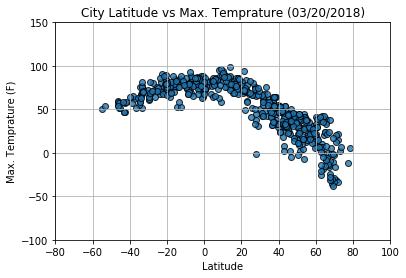

In [407]:
# Build a scatter plot for Latitude vs Temperature Plot

plt.scatter(weather_data["Latitude"],
            weather_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Max. Temprature (03/20/2018)")
plt.ylabel("Max. Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-100, 150])

# Save the figure
plt.savefig("Latitude vs Temperature Plot.png",bbox_inches="tight")

# Show plot
plt.show()

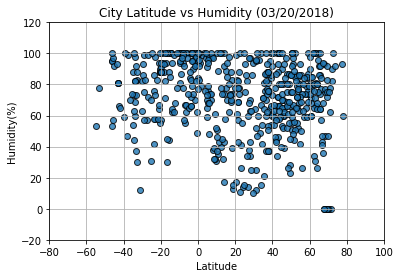

In [408]:
# Build a scatter plot for Latitude vs Humidity Plot

plt.scatter(weather_data["Latitude"],
            weather_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (03/20/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Latitude vs Humidity Plot.png",bbox_inches="tight")

# Show plot
plt.show()

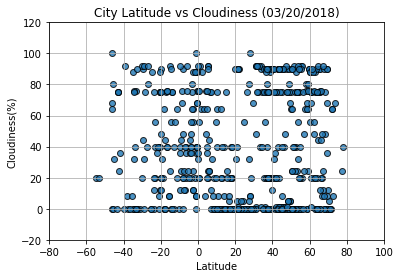

In [409]:
# Build a scatter plot for Latitude vs Cloudiness Plot

plt.scatter(weather_data["Latitude"],
            weather_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (03/20/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Latitude vs Cloudiness Plot.png",bbox_inches="tight")

# Show plot
plt.show()

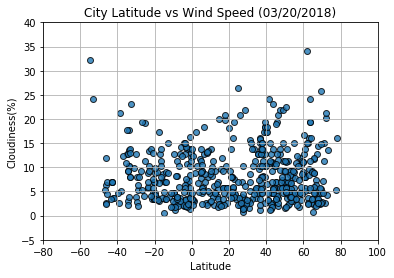

In [411]:
# Build a scatter plot for Latitude vs Wind Speed Plot

plt.scatter(weather_data["Latitude"],
            weather_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (03/20/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])

# Save the figure
plt.savefig("Latitude vs Wind Speed Plot.png",bbox_inches="tight")

# Show plot
plt.show()